In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import math
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

In [2]:
ser = Ncm.Serialize.new(0)
Ncm.cfg_init()
data = ser.from_file("/root/NumCosmo/data/nc_data_snia_diag_legacy.obj")
print(data.x.get(1))

0.01588


In [3]:
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats as scs
import scipy.integrate as integrate
import scipy.optimize as opt
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math

## Exercise from second list


Implementing the functions needed. Supernova1 is with only three paramaters.

In [4]:
class SuperNova1:
    def __init__(self,z_list, sigma_list, u_list):
        self.z_l = z_list
        self.s_l = sigma_list
        self.u_l = u_list
        self.theta = self.fit_theta()
        
    def do_E_z(self, theta, z):
        return math.sqrt(theta[1] * (1 + z)**3 + theta[2])
        
    
    def do_int_E2(self, theta, z, zfactor = None):
        def integrand(z_int):
            case = 1
            if zfactor == 1:
                case = (1 + z)**3
            return (-1/2 * (1 * (case)) / ((theta[1] * (1 + z)**3 + theta[2])** (3/2)))
        return (integrate.quad(integrand, 0, z)[0])
    
    def do_D_c(self, theta,z):
        def integrand(z_int):
            return 1 / (self.do_E_z(theta, z_int))
        return (integrate.quad(integrand, 0, z)[0])

    def do_D_t(self, theta, z):
        D_c = self.do_D_c(theta, z) 
        return D_c
    
    def do_D_l(self, theta, z):
        return (1+z) * self.do_D_t(theta, z)
    
    def do_u_z(self, theta, z):
        h0 = theta[0]
        return 5 * math.log10(self.do_D_l(theta, z)) + 25 + 5*np.log10((3 * 10**5) / h0)
    
    def likelihood(self, theta):
        zl= self.z_l
        sl = self.s_l
        ul = self.u_l
        exp_pow = 0
        for a in range (0, len(zl)):
            u_uobs = self.do_u_z(theta, zl[a]) - ul[a]
            sum_i = (u_uobs**2) / (sl[a]**2)
            exp_pow += sum_i
        return math.exp(-0.5 * exp_pow)
    
    def likelihood_ln(self, theta):
        return (-2.0 * math.log(self.likelihood(theta)))
    
    def fit_theta(self):
        x0 = [70,0.27,0.73]
        bnds = ((0, None), (0.0, 1.0), (0, 1.0))
        x0_np = np.array(x0)
        return opt.minimize(self.likelihood_ln, x0_np, bounds=bnds, method='Nelder-Mead', tol=1e-6)
    
    def _do_derivatives(self, z):
        theta = self.theta['x']
        d_0 = -5 * 1 / theta[0]
        d_1 = 5 * (1 / self.do_E_z(theta, z)) * self.do_int_E2(theta, z, zfactor=1)
        d_2 = 5 * (1 / self.do_E_z(theta, z)) * self.do_int_E2(theta, z)
        d_vec = [d_0, d_1, d_2]
        return d_vec 
    
    
    def do_fhiser_matrix(self):
        z_mean = sum(self.z_l)/ len(self.z_l)
        theta = self.theta['x']
        matrix = [0 ,0 ,0]
        line = []
        d_vec = []
        for a in range (0,3):
            for b in range (0,3):
                sum2 = 0
                for c in range (len(self.z_l)):
                    d_vec = self._do_derivatives(self.z_l[c])
                    sum2 += 2 * d_vec[a]*d_vec[b] / (self.s_l[c]**2)
                line.append(sum2)
            matrix[a] = line
            line = []
            d_vec = []
        return matrix
        
        

a) -Best fit

In [5]:
u_list = [34.117469999999997, 34.082340000000002, 34.070259999999998, 34.404829999999997, 34.128639999999997, 34.451230000000002, 34.318800000000003, 34.215560000000004, 34.161239999999999, 34.488590000000002, 34.575380000000003, 34.493369999999999, 34.940350000000002, 35.145130000000002, 35.249839999999999, 35.227229999999999, 34.93018, 35.191389999999998, 35.352319999999999, 35.34151, 35.56503, 35.14931, 35.994030000000002, 35.821800000000003, 35.558, 35.531300000000002, 35.78839, 35.836199999999998, 36.112879999999997, 36.28389, 36.275149999999996, 36.727640000000001, 36.382930000000002, 36.82694, 36.631860000000003, 36.793500000000002, 36.60604, 37.540019999999998, 37.603360000000002, 37.641710000000003, 37.464709999999997, 38.12106, 38.43656, 38.88447, 40.570869999999999, 40.682099999999998, 40.730200000000004, 40.998739999999998, 40.945410000000003, 41.25853, 41.322809999999997, 41.36636, 41.440710000000003, 41.473939999999999, 41.48489, 41.48789, 41.771929999999998, 41.775739999999999, 41.86542, 42.037439999999997, 42.030110000000001, 42.08907, 42.267910000000001, 42.17991, 42.428370000000001, 42.439010000000003, 42.643340000000002, 42.591529999999999, 42.824269999999999, 42.486130000000003, 42.461010000000002, 42.51052, 42.46461, 42.760820000000002, 42.880760000000002, 42.561369999999997, 42.514989999999997, 42.79513, 42.960189999999997, 43.02993, 42.745910000000002, 43.13241, 43.022689999999997, 43.397129999999997, 43.0456, 43.143700000000003, 43.022579999999998, 43.236460000000001, 43.17559, 43.208649999999999, 43.28689, 43.426960000000001, 43.169130000000003, 43.452640000000002, 43.353000000000002, 43.489539999999998, 43.691070000000003, 43.94979, 43.651919999999997, 43.531529999999997, 43.543680000000002, 44.41386, 43.474789999999999, 43.870280000000001, 44.094340000000003, 43.707729999999998, 44.258890000000001, 44.552239999999998, 44.429130000000001, 43.506959999999999, 43.953150000000001, 43.62209, 43.999270000000003, 43.940669999999997, 44.672240000000002]
sigma_list = [0.19292000000000001, 0.19033, 0.19617999999999999, 0.18698999999999999, 0.18648000000000001, 0.18865000000000001, 0.18634999999999999, 0.18315999999999999, 0.18215000000000001, 0.18018999999999999, 0.17867, 0.17172999999999999, 0.16571, 0.16145999999999999, 0.16600999999999999, 0.16137000000000001, 0.15934000000000001, 0.15994, 0.16148999999999999, 0.15581999999999999, 0.19253999999999999, 0.15323999999999999, 0.15362000000000001, 0.24753, 0.15085999999999999, 0.15947, 0.15057999999999999, 0.14807999999999999, 0.14657999999999999, 0.14294999999999999, 0.14374000000000001, 0.14305999999999999, 0.14054, 0.14433000000000001, 0.13855999999999999, 0.13921, 0.14169999999999999, 0.13900000000000001, 0.1394, 0.14005999999999999, 0.13743, 0.13893, 0.14224999999999999, 0.14007, 0.13249, 0.13172, 0.13195000000000001, 0.13503999999999999, 0.13167999999999999, 0.13138, 0.13161999999999999, 0.13266, 0.13228999999999999, 0.13173000000000001, 0.13203000000000001, 0.13446, 0.13369, 0.13657, 0.13833000000000001, 0.13447000000000001, 0.14319000000000001, 0.13549, 0.13478999999999999, 0.13639999999999999, 0.13677, 0.14183999999999999, 0.14221, 0.15515000000000001, 0.15376000000000001, 0.14235999999999999, 0.13555, 0.13421, 0.14868999999999999, 0.13919000000000001, 0.14176, 0.15886, 0.13417999999999999, 0.13671, 0.14465, 0.14410000000000001, 0.13569000000000001, 0.14562, 0.14354, 0.15769, 0.14005000000000001, 0.18895999999999999, 0.15690000000000001, 0.18373, 0.15179999999999999, 0.16864999999999999, 0.15110000000000001, 0.17566000000000001, 0.15923999999999999, 0.14326, 0.15151000000000001, 0.15898000000000001, 0.32857999999999998, 0.29466999999999999, 0.28556999999999999, 0.33106999999999998, 0.25391999999999998, 0.37047000000000002, 0.22628999999999999, 0.36829000000000001, 0.32807999999999998, 0.28938999999999998, 0.36984, 0.40148, 0.44995000000000002, 0.30181999999999998, 0.29831000000000002, 0.26844000000000001, 0.31807000000000002, 0.51326000000000005, 0.54895000000000005]
z_list = [0.015429999999999999, 0.015879999999999998, 0.016150000000000001, 0.016310000000000002, 0.016449999999999999, 0.01661, 0.016830000000000001, 0.01721, 0.017340000000000001, 0.017649999999999999, 0.01814, 0.01983, 0.021839999999999998, 0.023230000000000001, 0.02351, 0.024160000000000001, 0.024559999999999998, 0.024819999999999998, 0.025940000000000001, 0.02605, 0.02632, 0.027900000000000001, 0.029610000000000001, 0.030130000000000001, 0.03057, 0.030630000000000001, 0.031559999999999998, 0.034799999999999998, 0.036490000000000002, 0.039280000000000002, 0.042909999999999997, 0.04512, 0.048759999999999998, 0.050099999999999999, 0.050220000000000001, 0.052979999999999999, 0.053710000000000001, 0.06336, 0.070760000000000003, 0.074789999999999995, 0.078850000000000003, 0.087760000000000005, 0.10083, 0.12470000000000001, 0.24859999999999999, 0.26300000000000001, 0.28499999999999998, 0.29120000000000001, 0.33100000000000002, 0.33729999999999999, 0.3402, 0.34599999999999997, 0.35699999999999998, 0.35780000000000001, 0.36899999999999999, 0.37090000000000001, 0.41499999999999998, 0.42999999999999999, 0.44900000000000001, 0.45100000000000001, 0.4607, 0.4627, 0.46999999999999997, 0.496, 0.50429999999999997, 0.52100000000000002, 0.52600000000000002, 0.53200000000000003, 0.54800000000000004, 0.55000000000000004, 0.55159999999999998, 0.55700000000000005, 0.57099999999999995, 0.58099999999999996, 0.58169999999999999, 0.59199999999999997, 0.60399999999999998, 0.60999999999999999, 0.61299999999999999, 0.62, 0.62680000000000002, 0.63300000000000001, 0.64300000000000002, 0.67900000000000005, 0.68799999999999994, 0.69099999999999995, 0.69499999999999995, 0.70699999999999996, 0.70999999999999996, 0.72099999999999997, 0.72999999999999998, 0.74099999999999999, 0.752, 0.75600000000000001, 0.79100000000000004, 0.80000000000000004, 0.81000000000000005, 0.81100000000000005, 0.81699999999999995, 0.81799999999999995, 0.82179999999999997, 0.82999999999999996, 0.83999999999999997, 0.86799999999999999, 0.87, 0.90500000000000003, 0.91000000000000003, 0.92710000000000004, 0.93000000000000005, 0.94899999999999995, 0.94999999999999996, 0.95999999999999996, 0.96099999999999997, 0.98299999999999998, 1.01]



sp1 = SuperNova1(z_list,sigma_list,u_list)
result = sp1.theta['x']
print(f"The best fit found is:$ H_0$ = {result[0]} km/s/Mpc, $\Omega_m$ = {result[1]}, $\Omega_\Lambda$ = {result[2]}")


The best fit found is:$ H_0$ = 69.68452705520892 km/s/Mpc, $\Omega_m$ = 0.2652961615539559, $\Omega_\Lambda$ = 0.7456148337377471


a) Fisher matrix
For information about this topic, I recommend https://sci-hub.hkvisa.net/10.1086/303939, but bear in mind that we do not have a normalization factor and this will create some differences between our computations and the paper's.

In [6]:
print(f'The fisher Information Matrix for $H_0$,$\Omega_m$ and $\Omega_\Lambda$ is: \n {sp1.do_fhiser_matrix()[0]}\n {sp1.do_fhiser_matrix()[1]} \n {sp1.do_fhiser_matrix()[2]}\n')

The fisher Information Matrix for $H_0$,$\Omega_m$ and $\Omega_\Lambda$ is: 
 [46.48281407132796, 670.6548688109673, 194.9291650973872]
 [670.6548688109673, 15684.840052972382, 3899.7880330977446] 
 [194.9291650973872, 3899.7880330977446, 1081.5894401197713]



a)Confidence regions
For a 5 dimensional gaussian distribution with an hipotesis with 2 degrees of freedom fixed, we can affirm that
\begin{equation}
\lambda = \frac{L(D|\hat{\theta_0})}{L(D|\hat{\theta})} \rightarrow -2\ln \lambda \sim X^2_l
,\end{equation}
where $l = 5 - 2 = 3$. From this relation, we have that our confidence region is defined as
\begin{equation}
-2\ln \lambda \leq X^0_l
.\end{equation}
To find the confidence regions,
\begin{equation}
\int_{X_{0l}}^\infty P_{X^2_l}(x)dx = \alpha
.\end{equation}
We know that 
\begin{equation}
 P_{X^2_3}(x) = \frac{1}{\Gamma(\frac{3}{2}) 2^{3/2}}x^{3/2 - 1}e^{-x/2} = \frac{1}{\sqrt{2\pi}}\sqrt{x}e^{-x/2}
.\end{equation}
For 1,2 and 3$\sigma$, $\alpha = 0.3173, 0.045, 0.0027$. After finding $X_{0l}$, I will need to compute the likelihood when all the parameters are set free to compute the confidence regions for $\lambda$. Thus, I will now implement the code for $5$ parameters.


In [7]:
class SuperNova2:
    def __init__(self,z_list, sigma_list, u_list):
        self.z_l = z_list
        self.s_l = sigma_list
        self.u_l = u_list
        self.theta = self.fit_theta()
        
    def do_E_z(self, theta, z):
        return (theta[1] * (1 + z)**2 + theta[2] * (1 + z)**3 + theta[3] * (1 + z)**4 + theta[4])
        
    
    def do_D_c(self, theta,z):
        def integrand(z_int):
            return (1 / self.do_E_z(theta, z_int))
        return integrate.quad(integrand, 0, z)[0]

    def do_D_t(self, theta, z):
        D_c = self.do_D_c(theta, z) 
        omega_k0_sqrt = math.sqrt(theta[1])
        return (np.sinh(D_c * omega_k0_sqrt) / omega_k0_sqrt)
    
    def do_D_l(self, theta, z):
        return (1+z) * self.do_D_t(theta, z)
    
    def do_u_z(self, theta, z):
        h0 = theta[0]
        return 5 * math.log10(self.do_D_l(theta, z)) + 25 + 5*np.log10((3 * 10**5) / h0)
    
    def likelihood(self, theta):
        zl= self.z_l
        sl = self.s_l
        ul = self.u_l
        exp_pow = 0
        for a in range (0, len(zl)):
            u_uobs = self.do_u_z(theta, zl[a]) - ul[a]
            sum_i = (u_uobs**2) / (sl[a]**2)
            exp_pow += sum_i
        return math.exp(-0.5 * exp_pow)
    
    def likelihood_ln(self, theta):
        return (-2.0 * math.log(self.likelihood(theta)))
    
    def fit_theta(self):
        x0 = [70,0.02,0.27,1e-05,0.73]
        bnds = ((0, 80.0), (None, None), (0, 1.0), (0, 1.0), (0, 1.0))
        x0_np = np.array(x0)
        return opt.minimize(self.likelihood_ln, x0_np, bounds=bnds, method='Nelder-Mead', tol=1e-2)
    
            

In [8]:
u_list = [34.117469999999997, 34.082340000000002, 34.070259999999998, 34.404829999999997, 34.128639999999997, 34.451230000000002, 34.318800000000003, 34.215560000000004, 34.161239999999999, 34.488590000000002, 34.575380000000003, 34.493369999999999, 34.940350000000002, 35.145130000000002, 35.249839999999999, 35.227229999999999, 34.93018, 35.191389999999998, 35.352319999999999, 35.34151, 35.56503, 35.14931, 35.994030000000002, 35.821800000000003, 35.558, 35.531300000000002, 35.78839, 35.836199999999998, 36.112879999999997, 36.28389, 36.275149999999996, 36.727640000000001, 36.382930000000002, 36.82694, 36.631860000000003, 36.793500000000002, 36.60604, 37.540019999999998, 37.603360000000002, 37.641710000000003, 37.464709999999997, 38.12106, 38.43656, 38.88447, 40.570869999999999, 40.682099999999998, 40.730200000000004, 40.998739999999998, 40.945410000000003, 41.25853, 41.322809999999997, 41.36636, 41.440710000000003, 41.473939999999999, 41.48489, 41.48789, 41.771929999999998, 41.775739999999999, 41.86542, 42.037439999999997, 42.030110000000001, 42.08907, 42.267910000000001, 42.17991, 42.428370000000001, 42.439010000000003, 42.643340000000002, 42.591529999999999, 42.824269999999999, 42.486130000000003, 42.461010000000002, 42.51052, 42.46461, 42.760820000000002, 42.880760000000002, 42.561369999999997, 42.514989999999997, 42.79513, 42.960189999999997, 43.02993, 42.745910000000002, 43.13241, 43.022689999999997, 43.397129999999997, 43.0456, 43.143700000000003, 43.022579999999998, 43.236460000000001, 43.17559, 43.208649999999999, 43.28689, 43.426960000000001, 43.169130000000003, 43.452640000000002, 43.353000000000002, 43.489539999999998, 43.691070000000003, 43.94979, 43.651919999999997, 43.531529999999997, 43.543680000000002, 44.41386, 43.474789999999999, 43.870280000000001, 44.094340000000003, 43.707729999999998, 44.258890000000001, 44.552239999999998, 44.429130000000001, 43.506959999999999, 43.953150000000001, 43.62209, 43.999270000000003, 43.940669999999997, 44.672240000000002]
sigma_list = [0.19292000000000001, 0.19033, 0.19617999999999999, 0.18698999999999999, 0.18648000000000001, 0.18865000000000001, 0.18634999999999999, 0.18315999999999999, 0.18215000000000001, 0.18018999999999999, 0.17867, 0.17172999999999999, 0.16571, 0.16145999999999999, 0.16600999999999999, 0.16137000000000001, 0.15934000000000001, 0.15994, 0.16148999999999999, 0.15581999999999999, 0.19253999999999999, 0.15323999999999999, 0.15362000000000001, 0.24753, 0.15085999999999999, 0.15947, 0.15057999999999999, 0.14807999999999999, 0.14657999999999999, 0.14294999999999999, 0.14374000000000001, 0.14305999999999999, 0.14054, 0.14433000000000001, 0.13855999999999999, 0.13921, 0.14169999999999999, 0.13900000000000001, 0.1394, 0.14005999999999999, 0.13743, 0.13893, 0.14224999999999999, 0.14007, 0.13249, 0.13172, 0.13195000000000001, 0.13503999999999999, 0.13167999999999999, 0.13138, 0.13161999999999999, 0.13266, 0.13228999999999999, 0.13173000000000001, 0.13203000000000001, 0.13446, 0.13369, 0.13657, 0.13833000000000001, 0.13447000000000001, 0.14319000000000001, 0.13549, 0.13478999999999999, 0.13639999999999999, 0.13677, 0.14183999999999999, 0.14221, 0.15515000000000001, 0.15376000000000001, 0.14235999999999999, 0.13555, 0.13421, 0.14868999999999999, 0.13919000000000001, 0.14176, 0.15886, 0.13417999999999999, 0.13671, 0.14465, 0.14410000000000001, 0.13569000000000001, 0.14562, 0.14354, 0.15769, 0.14005000000000001, 0.18895999999999999, 0.15690000000000001, 0.18373, 0.15179999999999999, 0.16864999999999999, 0.15110000000000001, 0.17566000000000001, 0.15923999999999999, 0.14326, 0.15151000000000001, 0.15898000000000001, 0.32857999999999998, 0.29466999999999999, 0.28556999999999999, 0.33106999999999998, 0.25391999999999998, 0.37047000000000002, 0.22628999999999999, 0.36829000000000001, 0.32807999999999998, 0.28938999999999998, 0.36984, 0.40148, 0.44995000000000002, 0.30181999999999998, 0.29831000000000002, 0.26844000000000001, 0.31807000000000002, 0.51326000000000005, 0.54895000000000005]
z_list = [0.015429999999999999, 0.015879999999999998, 0.016150000000000001, 0.016310000000000002, 0.016449999999999999, 0.01661, 0.016830000000000001, 0.01721, 0.017340000000000001, 0.017649999999999999, 0.01814, 0.01983, 0.021839999999999998, 0.023230000000000001, 0.02351, 0.024160000000000001, 0.024559999999999998, 0.024819999999999998, 0.025940000000000001, 0.02605, 0.02632, 0.027900000000000001, 0.029610000000000001, 0.030130000000000001, 0.03057, 0.030630000000000001, 0.031559999999999998, 0.034799999999999998, 0.036490000000000002, 0.039280000000000002, 0.042909999999999997, 0.04512, 0.048759999999999998, 0.050099999999999999, 0.050220000000000001, 0.052979999999999999, 0.053710000000000001, 0.06336, 0.070760000000000003, 0.074789999999999995, 0.078850000000000003, 0.087760000000000005, 0.10083, 0.12470000000000001, 0.24859999999999999, 0.26300000000000001, 0.28499999999999998, 0.29120000000000001, 0.33100000000000002, 0.33729999999999999, 0.3402, 0.34599999999999997, 0.35699999999999998, 0.35780000000000001, 0.36899999999999999, 0.37090000000000001, 0.41499999999999998, 0.42999999999999999, 0.44900000000000001, 0.45100000000000001, 0.4607, 0.4627, 0.46999999999999997, 0.496, 0.50429999999999997, 0.52100000000000002, 0.52600000000000002, 0.53200000000000003, 0.54800000000000004, 0.55000000000000004, 0.55159999999999998, 0.55700000000000005, 0.57099999999999995, 0.58099999999999996, 0.58169999999999999, 0.59199999999999997, 0.60399999999999998, 0.60999999999999999, 0.61299999999999999, 0.62, 0.62680000000000002, 0.63300000000000001, 0.64300000000000002, 0.67900000000000005, 0.68799999999999994, 0.69099999999999995, 0.69499999999999995, 0.70699999999999996, 0.70999999999999996, 0.72099999999999997, 0.72999999999999998, 0.74099999999999999, 0.752, 0.75600000000000001, 0.79100000000000004, 0.80000000000000004, 0.81000000000000005, 0.81100000000000005, 0.81699999999999995, 0.81799999999999995, 0.82179999999999997, 0.82999999999999996, 0.83999999999999997, 0.86799999999999999, 0.87, 0.90500000000000003, 0.91000000000000003, 0.92710000000000004, 0.93000000000000005, 0.94899999999999995, 0.94999999999999996, 0.95999999999999996, 0.96099999999999997, 0.98299999999999998, 1.01]



sp2 = SuperNova2(z_list,sigma_list,u_list)


Going back to our calculations,

In [9]:
x0_list = [scs.chi2.ppf(0.6827, 3), scs.chi2.ppf(0.955, 3), scs.chi2.ppf(0.9973, 3)]

print(f"For 1,2,3sigma and l=3, X^2_0 = {x0_list}")


For 1,2,3sigma and l=3, X^2_0 = [3.5268221788659933, 8.049484717482304, 14.1562525005409]


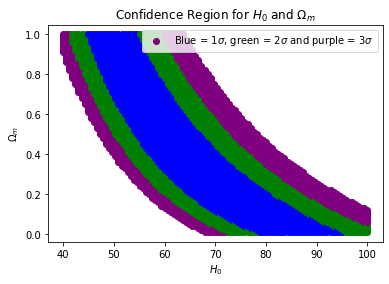

In [10]:
#To find the confidence region, we must compute the parameter values so that -2ln \lambda < x0
interval0 = np.linspace(40 ,100, 100)
interval1 = np.linspace(0.01 ,1.0, 100)
for a in interval0:
    for b in interval1:
        theta0 = [69.68452706,  0.26529616,  0.74561483]
        theta0[0] = a
        theta0[1] = b
        c = ['black']
        label = ['']
        try:
            lambda_f0 = sp1.likelihood_ln(theta0) / sp2.likelihood_ln(sp2.theta['x'])
            if lambda_f0<3.52:
                c[0]='blue'
                label='$1\sigma$'
            elif lambda_f0 > 3.52 and lambda_f0 <8.049484717482304:
                c[0]='green'
                label='$2\sigma$'
            elif lambda_f0 > 8.049484717482304 and lambda_f0 <14.1562525005409:
                c[0]='purple'
                label='$3\sigma$'
            plt.scatter(a, b, c=c)
        except ValueError:
            pass
plt.legend(['Blue = $1\sigma$, green = $2\sigma$ and purple = $3\sigma$'])
plt.title('Confidence Region for $H_0$ and $\Omega_m$')
plt.ylabel('$\Omega_m$')
plt.xlabel('$H_0$')
plt.show()



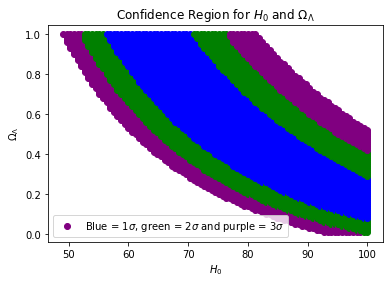

In [11]:
#To find the confidence region, we must compute the parameter values so that -2ln \lambda < x0
interval0 = np.linspace(40,100, 100)
interval1 = np.linspace(0.01 ,1.0, 100)
for a in interval0:
    for b in interval1:
        theta0 = [69.68452706,  0.26529616,  0.74561483]
        theta0[0] = a
        theta0[2] = b
        c = ['black']
        label = ['']
        try:
            lambda_f0 = sp1.likelihood_ln(theta0) / sp2.likelihood_ln(sp2.theta['x'])
            if lambda_f0<3.52:
                c[0]='blue'
                label='$1\sigma$'
            elif lambda_f0 > 3.52 and lambda_f0 <8.049484717482304:
                c[0]='green'
                label='$2\sigma$'
            elif lambda_f0 > 8.049484717482304 and lambda_f0 <14.1562525005409:
                c[0]='purple'
                label='$3\sigma$'
            plt.scatter(a, b, c=c)
        except ValueError:
            pass
plt.legend(['Blue = $1\sigma$, green = $2\sigma$ and purple = $3\sigma$'])
plt.title('Confidence Region for $H_0$ and $\Omega_\Lambda$')
plt.ylabel('$\Omega_\Lambda$')
plt.xlabel('$H_0$')
plt.show()




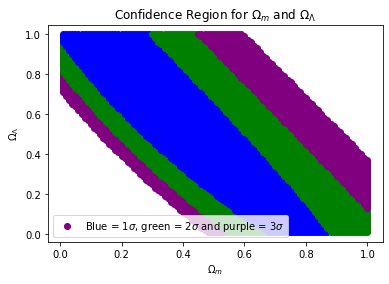

In [12]:
#To find the confidence region, we must compute the parameter values so that -2ln \lambda < x0
interval0 = np.linspace(0.01 ,1.0, 100)
interval1 = np.linspace(0.01 ,1.0, 100)
for a in interval0:
    for b in interval1:
        theta0 = [69.68452706,  0.26529616,  0.74561483]
        theta0[1] = a
        theta0[2] = b
        c = ['black']
        label = ['']
        try:
            lambda_f0 = sp1.likelihood_ln(theta0) / sp2.likelihood_ln(sp2.theta['x'])
            if lambda_f0<3.52:
                c[0]='blue'
                label='$1\sigma$'
            elif lambda_f0 > 3.52 and lambda_f0 <8.049484717482304:
                c[0]='green'
                label='$2\sigma$'
            elif lambda_f0 > 8.049484717482304 and lambda_f0 <14.1562525005409:
                c[0]='purple'
                label='$3\sigma$'
            plt.scatter(a, b, c=c)
        except ValueError:
            pass
plt.title('Confidence Region for $\Omega_m$ and $\Omega_\Lambda$')
plt.legend(['Blue = $1\sigma$, green = $2\sigma$ and purple = $3\sigma$'])
plt.xlabel('$\Omega_m$')
plt.ylabel('$\Omega_\Lambda$')
plt.show()


